In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from pandas_profiling import ProfileReport 
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import sklearn
import pickle

In [2]:
warnings.filterwarnings(action='ignore')

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df['target'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [10]:
df['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [11]:
#Report = ProfileReport(df)
#Report

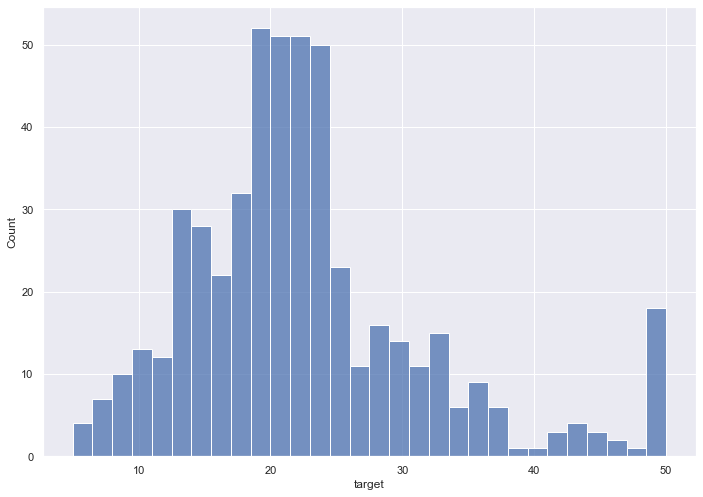

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(df['target'], bins=30)
plt.show()

<AxesSubplot:>

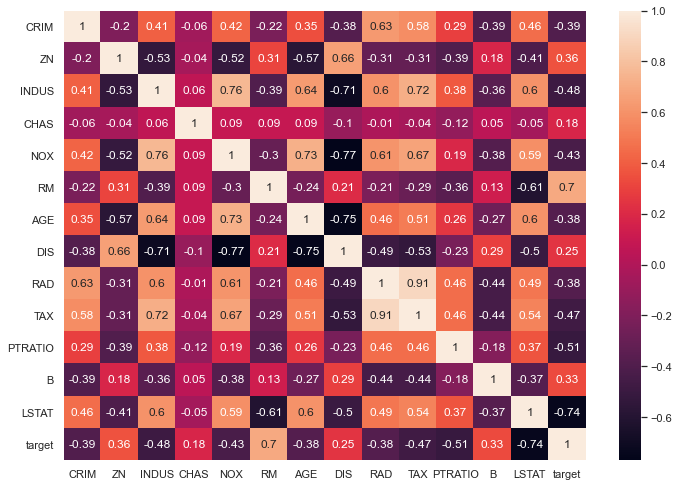

In [13]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

1. To fit a linear regression model, we select those features which have a high correlation with our target variable target. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with target(-0.74).

2. An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.

<AxesSubplot:>

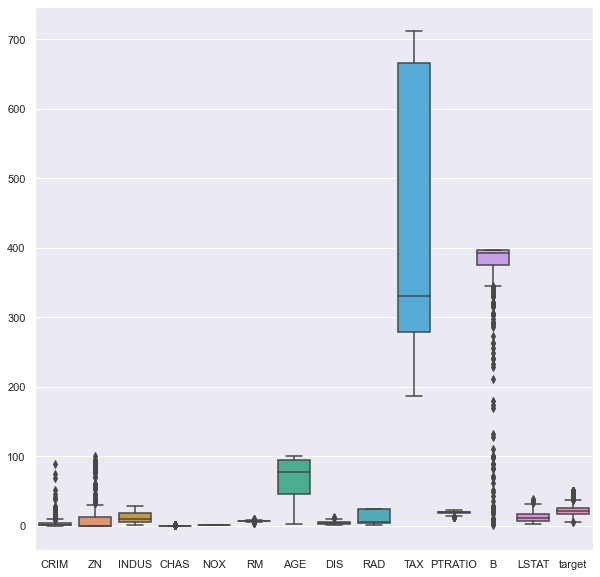

In [14]:
fix, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=df,ax=ax)

In [15]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1

((df < (q1-1.5*IQR)) | (df > (q3+1.5*IQR))).sum()

CRIM       66
ZN         68
INDUS       0
CHAS       35
NOX         0
RM         30
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO    15
B          77
LSTAT       7
target     40
dtype: int64

In [16]:
columns = ['CRIM','ZN','CHAS','RM','DIS','PTRATIO','B','LSTAT','target']
for i in columns:
    q75,q25=np.percentile(df[i],[75,25])
    iqr=q75 - q25
    minimum = q25 - 1.5*iqr
    maximum = q75 + 1.5*iqr
    df.loc[df[i] < minimum, i] = minimum
    df.loc[df[i] > maximum, i] = maximum

In [17]:
((df < (q1-1.5*IQR)) | (df > (q3+1.5*IQR))).sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [18]:
df.skew()

CRIM       1.282313
ZN         1.261340
INDUS      0.295022
CHAS       0.000000
NOX        0.729308
RM         0.296640
AGE       -0.598963
DIS        0.908467
RAD        1.004815
TAX        0.669956
PTRATIO   -0.762495
B         -1.164208
LSTAT      0.808671
target     0.353614
dtype: float64

In [19]:
col = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
for i in col:
    df[i]=np.log(df[i]+1)

In [20]:
df.skew()

CRIM       0.911765
ZN         1.096097
INDUS     -0.424030
CHAS       0.000000
NOX        0.584347
RM         0.010084
AGE       -1.596349
DIS        0.305238
RAD        0.532760
TAX        0.331753
PTRATIO   -0.943444
B         -1.195596
LSTAT     -0.209744
target     0.353614
dtype: float64

In [21]:
scaling_feature = [feature for feature in df.columns if feature not in ['target']]
df[scaling_feature].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006300,2.944439,1.196948,0.0,0.430483,2.024853,4.192680,1.627278,0.693147,5.693732,2.791165,5.986201,1.788421
1,0.026944,0.000000,2.088153,0.0,0.384582,2.004314,4.380776,1.786261,1.098612,5.493061,2.933857,5.986201,2.316488
2,0.026924,0.000000,2.088153,0.0,0.384582,2.102303,4.128746,1.786261,1.098612,5.493061,2.933857,5.975919,1.615420
3,0.031857,0.000000,1.156881,0.0,0.377066,2.079192,3.845883,1.954757,1.386294,5.407172,2.980619,5.980479,1.371181
4,0.066770,0.000000,1.156881,0.0,0.377066,2.097650,4.010963,1.954757,1.386294,5.407172,2.980619,5.986201,1.845300


In [22]:
scaler = StandardScaler()
data = scaler.fit(df[scaling_feature])

In [23]:
scaler.transform(df[scaling_feature])

array([[-0.85006201,  1.43046824, -1.66761821, ..., -1.47091093,
         0.77357394, -1.27953637],
       [-0.82616667, -0.59762399, -0.3228211 , ..., -0.24270982,
         0.77357394, -0.29459892],
       [-0.82618921, -0.59762399, -0.3228211 , ..., -0.24270982,
         0.57306181, -1.6022125 ],
       ...,
       [-0.78907765, -0.59762399,  0.38849979, ...,  1.110245  ,
         0.77357394, -1.08426874],
       [-0.73698369, -0.59762399,  0.38849979, ...,  1.110245  ,
         0.60374007, -0.86208771],
       [-0.80373781, -0.59762399,  0.38849979, ...,  1.110245  ,
         0.77357394, -0.54208217]])

In [24]:
VIF_df=pd.DataFrame()
VIF_df['vif']=[variance_inflation_factor (scaler.transform(df[scaling_feature]),i) for i in range(scaler.transform(df[scaling_feature]).shape[1])]
VIF_df['feature']=df[scaling_feature].columns
VIF_df

,vif,feature
0,8.528090,CRIM
1,2.311685,ZN
2,3.723567,INDUS
3,NaN,CHAS
4,5.369480,NOX
5,2.094038,RM
6,2.385401,AGE
7,4.778701,DIS
8,5.952513,RAD
9,4.709209,TAX


In [25]:
data = pd.concat([df[['target']].reset_index(drop=True),pd.DataFrame(scaler.transform(df[scaling_feature]),columns=df[scaling_feature].columns)],axis=1)
data.head()

,target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,-0.850062,1.430468,-1.667618,0.0,-0.111204,0.510921,0.136758,0.361782,-1.812467,-0.609011,-1.470911,0.773574,-1.279536
1,21.6,-0.826167,-0.597624,-0.322821,0.0,-0.741058,0.272917,0.456001,0.748859,-1.272635,-1.117107,-0.242710,0.773574,-0.294599
2,34.7,-0.826189,-0.597624,-0.322821,0.0,-0.741058,1.408379,0.028245,0.748859,-1.272635,-1.117107,-0.242710,0.573062,-1.602212
3,33.4,-0.820479,-0.597624,-1.728078,0.0,-0.844197,1.140570,-0.451842,1.159096,-0.889619,-1.334579,0.159786,0.661995,-2.057761
4,36.2,-0.780067,-0.597624,-1.728078,0.0,-0.844197,1.354457,-0.171661,1.159096,-0.889619,-1.334579,0.159786,0.773574,-1.173446


In [26]:
X = data.drop('target',axis=1)
y = data['target']

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [28]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [29]:
print('Traning Score :{}'.format(rfr.score(X_train,y_train)))
print('Testing Score :{}'.format(rfr.score(X_test,y_test)))

Traning Score :0.9804881580893073
Testing Score :0.8709298670894379


In [31]:
param = {'criterion':['squared_error', 'poisson'],
         'min_samples_split':range(1,5,2),
         'min_samples_leaf':range(1,5,2),
         'max_features':['sqrt','log2']
}

grid = GridSearchCV(estimator=rfr, param_grid=param, cv=10, verbose=1, n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'poisson'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': range(1, 5, 2),
                         'min_samples_split': range(1, 5, 2)},
             verbose=1)

In [32]:
grid.best_params_

{'criterion': 'squared_error',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [33]:
rfr2 = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_features='sqrt', min_samples_leaf=1, 
                             min_samples_split=3)

rfr2.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_split=3)

In [34]:
pred = rfr2.predict(X_test)

In [35]:
print('Traning Score :{}'.format(rfr2.score(X_train,y_train)))
print('Testing Score :{}'.format(rfr2.score(X_test,y_test)))

Traning Score :0.9775253169869396
Testing Score :0.8810298853693082


In [37]:
print('MSE Score : {}'.format(mean_squared_error(pred, y_test)))
print('R2 Score : {}'.format(r2_score(pred, y_test)))

MSE Score : 5.820606912087876
R2 Score : 0.8472427867919611


In [38]:
file = 'Random_Forest.pkl'

pickle.dump(rfr2,open(file, 'wb'))

In [24]:
file = 'Scaler.pkl'

pickle.dump(scaler,open(file,'wb'))